# <span style="color:#F72585"><center>Métodos de Agrupamiento o Clustering</center></span>



<figure>
<center>
<img src="../Imagenes/Public_Market_in_Boquete.jpg" width=500 height=500 align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Public_Market_in_Boquete.jpg">FranHogan</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [Demo agrupamientos con scikit - learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)
1. [Top 5 Clustering Algorithms data scientist should know](https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/)

## <span style="color:#4361EE">Introducción</span>

La agrupación en clústeres es una técnica de aprendizaje automático que implica la agrupación de puntos de datos. Es un método de aprendizaje no supervisado y una técnica famosa para el análisis de datos estadísticos. Para un conjunto dado de puntos de datos, puede usar algoritmos de agrupamiento para clasificarlos en grupos específicos. Da como resultado exhibir propiedades similares en puntos de datos y propiedades diferentes para los diferentes grupos.

En esta lección trabajaremos con los siguientes métodos

1. k-medias o k-means.
1. Desplazamiento medio o mean-shift
1. dbscan

Adicionalmente visitaremos algunas técnicas para evaluar los resultados, en el caso de k-means, pero que son utilizables de manera general.


## <span style="color:#4361EE">Algoritmo k-medias o k-means</span>

<figure>
<center>
<img src="../Imagenes/kmeans.gif" width="600" height="600" align="center" /> 
</center>   
</figure>

Fuente: [Top 5 Clustering Algorithms data scientist should know](https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/)

Este es un algoritmo basado en calcular `el centroide de los grupos` en cada paso y agrupar los puntos alrededor de los centroides más cercanos. grupos.

### <span style="color:#4CC9F0">Funcionamiento del algoritmo</span>

En cada paso el algoritmo hace lo siguiente:

1. El algoritmo requiere como entrada el número de grupos (clúster). Inicializa aleatoriamente los puntos centrales. Recuerde que es crucial determinar el número de clases que utiliza. Por lo tanto, eche un vistazo a los datos disponibles e identifique características distintas. Los puntos centrales de los clústeres son  indicados como $X$ en el gráfico.

1. Clasifica cada punto de datos calculando la distancia entre los puntos particulares y cada centro de grupo. El siguiente paso es clasificar los puntos que pertenecen al grupo cuyo centro es el más cercano a él.

1. Con base en esta información, calcula la media de todos los vectores en el grupo particular y vuelva a calcular el centro del grupo.

1. Repite el procedimiento hasta alcanzar un número máximo de iteraciones o hasta asegurarse  de que los centros de los grupos no varíen mucho entre iteraciones.

El algoritmo es de tipo EM (Esperanza-Maximización). Matemáticamente el algoritmo se escribe como:


1. Escoger aleatoriamente algunos valores centros $m_k$.
1. **Paso E**. Para cada  $x_n$ sea $r_{nk}=1$, tal que $k =  \underset{k}{arg min} \{ ||x_n -m_k||$, y $r_{nl}=0$ para $l\ne k$.
1. **Paso M**. La función de pérdida (objetivo) a minimizar es dada por 
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||x_n - m_k ||^2.
$$ 
Esta función objetivo $J$ es cuadrática, así que solamente tiene un mínimo. El extremo se puede calcular directamente minimizando $J$ para obtener
$$
m_k = \frac{\sum_n r_{nk}x_n}{\sum_n r_{nk}}.
$$

Los pasos 2 y 3 se repiten hasta convergencia.


### <span style="color:#4CC9F0">Ventajas del algoritmo k-means</span>

* K-means es un método rápido porque no tiene muchos cálculos.

### <span style="color:#4CC9F0">Desventajas del algoritmo k-means</span>

* Identificar los clústeres  y determinar su número de  los grupos puede ser un aspecto desafiante. 
* Dado que comienza con una elección aleatoria de centros de conglomerados, los resultados pueden carecer de consistencia. Cada escogencia inicial aleatoria de centroides puede llevar a diferentes soluciones.

### <span style="color:#4CC9F0">Ejemplo: digits de scikit learn</span>

En esta sección hacemos una demostración detallada del método. Basado en [Demo agrupamientos con scikit - learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

En este ejemplo, comparamos las diversas estrategias de inicialización de K-means en términos de tiempo de ejecución y calidad de los resultados.

Como aquí se conoce las etiquetas verdaderas de los individuos, también aplicamos diferentes métricas de calidad de clúster para juzgar la bondad del ajuste de las etiquetas de clúster a etiquetas verdaderas.

Métricas de calidad del clúster evaluadas (para los detalles técnicos consulte la página [evaluación del rendimiento de la agrupación para obtener definiciones y discusiones sobre las métricas de scikit -learn](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)):

|Nombre corto| Nombre completo|
|---|---|
|homo| homogeneity score|
|compl|completeness score|
|v-meas|V measure|
|ARI|adjusted Rand index|
|AMI| adjusted mutual information|
|silhouette|silhouette coefficient|

#### <span style="color:#4CC9F0">Carga el conjunto de datos</span>

Comenzaremos cargando el conjunto de datos de dígitos. Este conjunto de datos contiene dígitos escritos a mano del 0 al 9. En el contexto de la agrupación, a uno le gustaría agrupar imágenes de manera que los dígitos escritos a mano en la imagen sean los mismos. Las imágenes son de tamaño 8*8 = 64.

In [2]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# dígitos: {n_digits}; # muestras: {n_samples}; # características {n_features}")

# dígitos: 10; # muestras: 1797; # características 64


#### <span style="color:#4CC9F0">Función para construir un punto de referencia: Benchmark</span>

Primero haremos nuestro `benchmark`. Con este benchmark, pretendemos comparar diferentes métodos de inicialización para KMeans. Nuestro benchmark:

1. Crea una canalización que escalará los datos usando un *StandardScaler*.
1. Entrena y cronometra la instalación de tuberías (pipeline);
1. Mide el rendimiento de la agrupación obtenida a través de diferentes métricas.

In [3]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark para evaluar el método de inicialización de KMeans.

    Parameters
    ----------
    kmeans : instancia KMeans
             una instancia inicializada de la clase:`~sklearn.cluster.KMeans` 
    name : str
           Nombre dado a la estrategia. Se utilizará para mostrar los resultados en un
           tabla
    data : ndarray de forma (n_samples, n_features)
          Los datos a agrupar
    labels : ndarray of shape (n_samples,)
            Las etiquetas que se utilizan para calcular las métricas de agrupación que se requieren 
            para supervisión.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Defina las métricas que requieren solo las etiquetas verdaderas y la estimacióm de 
    # etiquetas
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # El puntaje silhouette s require el conjunto completo de datos
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Muestra  los results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

#### <span style="color:#4CC9F0">Ejecuta el benchmark</span>

Compararemos tres enfoques:

1. Una inicialización usando kmeans++. Este método es estocástico y ejecutaremos la inicialización 4 veces;
1. Una inicialización aleatoria. Este método también es estocástico y ejecutaremos la inicialización 4 veces;
1. Una inicialización basada en una proyección PCA. De hecho, usaremos los componentes de PCA para inicializar KMeans. Este método es determinista y basta con una sola inicialización.

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("inicio\t\ttiempo\tinercia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
inicio		tiempo	inercia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.548s	69662	0.680	0.719	0.699	0.570	0.695	0.173
random   	0.130s	69707	0.675	0.716	0.694	0.560	0.691	0.165
PCA-based	0.061s	72686	0.636	0.658	0.647	0.521	0.643	0.141
__________________________________________________________________________________


#### <span style="color:#4CC9F0">Como interpretar las métricas</span>

Para los detalles técnicos consulte la página [evaluación del rendimiento de la agrupación para obtener definiciones y discusiones sobre las métricas de scikit -learn](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)):


Evaluar el rendimiento de un algoritmo de agrupamiento no es tan trivial como contar el número de errores o la precisión y recuperación de un algoritmo de clasificación supervisado. En particular, cualquier métrica de evaluación no debe tener en cuenta los valores absolutos de las etiquetas de clúster, sino más bien si este agrupamiento define separaciones de los datos similares a algún conjunto de clases de verdad básica o satisface alguna suposición tal que los miembros que pertenecen a la misma clase son más similares que miembros de diferentes clases según alguna métrica de similitud.

* Puntajes basados en `información mutua`. Dado el conocimiento de las asignaciones de la clase verdadera, `label_true` y las asignaciones del algoritmo de agrupamiento de las mismas muestras `label_pred`, la información mutua es una función que mide la concordancia de las dos asignaciones, ignorando las permutaciones. Están disponibles dos versiones normalizadas diferentes de esta medida, Información Mutua Normalizada (`NMI`) e Información Mutua Ajustada (`AMI`). NMI se usa a menudo en la literatura, mientras que AMI se propuso más recientemente y es normalizada contra la escogencia al azar. Valores más altos son mejores.

* Índice aleatorio o `Rand index`. Dado el conocimiento de las asignaciones de clase de vverdaderas  `label_true` y las asignaciones de algoritmo de agrupamiento de las mismas muestras `label_pred`, el índice Rand, ajustado (`ARI`)  o no ajustado(`NRI`) es una función que mide la similitud de las dos asignaciones, ignorando las permutaciones. El índice aleatorio no asegura obtener un valor cercano a 0,0 para un etiquetado aleatorio. El `ARI` corrige el azar y proporcionará una línea de base de este tipo. Además, ambos rand_score added_rand_score son simétricos: intercambiar el argumento no cambia las puntuaciones. Por lo tanto, pueden utilizarse como medidas de consenso. El etiquetado perfecto se califica con 1,0. Valores más altos son mejores.

* Homogeneidad o `homogeneity`, completitud o `completeness` y medida V o `V measure`. Dado el conocimiento de las asignaciones de clase verdadras de las muestras, es posible definir alguna métrica intuitiva utilizando el análisis de entropía condicional. En particular, Rosenberg y Hirschberg (2007) definen los siguientes dos objetivos deseables para cualquier asignación de clúster: 
    + homogeneidad: cada grupo contiene solo miembros de una sola clase.
    + Completitud: todos los miembros de una clase determinada se asignan al mismo grupo.
  Podemos convertir esos conceptos en puntajes `homogeneity_score` y `completeness_score`. Ambos están limitados al intrevalo [0, 1]. Cuanto más alto, mejor.
     + Medida V  o `V-measure`. Es la media armónica entre homogenidad y completitud. Cuanto más alto, mejor
     
* Coeficiente de silueta o  `silhouette coefficient`. Si no se conocen las etiquetas verdaderas, la evaluación debe realizarse utilizando el propio modelo. El Coeficiente de silueta (sklearn.metrics.silhouette_score) es un ejemplo de tal evaluación, donde una puntuación más alta del Coeficiente de silueta se relaciona con un modelo con clústeres mejor definidos. El Coeficiente de Silueta se define para cada muestra y se compone de dos puntuaciones:
     + a: La distancia media entre una muestra y todos los demás puntos de la misma clase.
     + b: La distancia media entre una muestra y todos los demás puntos en el siguiente grupo más cercano.
    El Coeficiente de silueta s para una sola muestra se calcula como:
$$
s = \frac{b-a}{\max (a,b)}
$$
      El Coeficiente de silueta para un conjunto de muestras se calcula como la media del Coeficiente de silueta para cada muestra. La puntuación está limitada entre -1 para un agrupamiento incorrecto y +1 para un agrupamiento muy denso. Las puntuaciones alrededor de cero indican grupos superpuestos. La puntuación es más alta cuando los conglomerados son densos y bien separados, lo que se relaciona con un concepto estándar de conglomerado.


#### <span style="color:#4CC9F0">Visualice los resultados en datos reducidos por PCA</span>

PCA permite proyectar los datos del espacio original de 64 dimensiones en un espacio de menor dimensión. Posteriormente, podemos usar PCA para proyectar en un espacio bidimensional y trazar los datos y los grupos en este nuevo espacio.

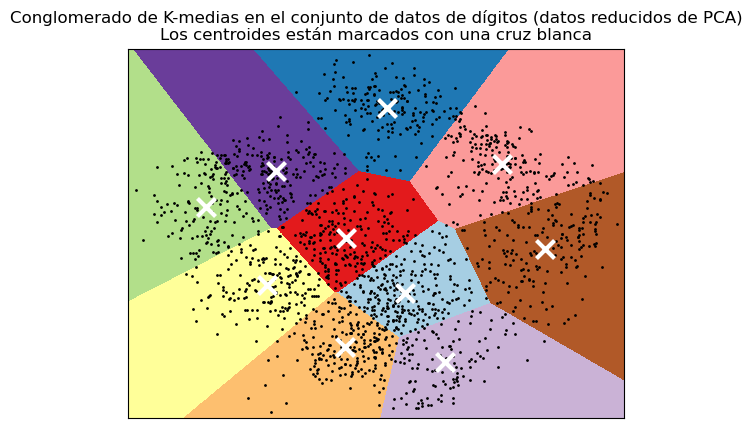

In [10]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "Conglomerado de K-medias en el conjunto de datos de dígitos (datos reducidos de PCA)\n"
    "Los centroides están marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## <span style="color:#4361EE">Algoritmo Algoritmo de agrupamiento de desplazamiento medio o mean-shift</span>

<figure>
<center>
<img src="../Imagenes/mean-shift.gif" width="600" height="600" align="center" /> 
</center>   
</figure>

Fuente: [Top 5 Clustering Algorithms data scientist should know](https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/)

Este es un algoritmo de tipo `ventana deslizante`. La idea central es  encontrar las áreas densas de los puntos de datos. 

Mean-shift Clustering es un algoritmo basado en el centroide y tiene como el objetivo  ubicar los puntos centrales de cada grupo. Funciona actualizando los candidatos para los puntos centrales como la media de los puntos dentro de la ventana deslizante.

La etapa de pos procesamiento es la filtración de las ventanas candidatas. Ayuda a eliminar los casi duplicados. Por lo tanto, el resultado es la formación de un conjunto final de puntos centrales junto con sus grupos correspondientes.

### <span style="color:#4CC9F0">Funcionamiento del algortimo</span>

Suponga que se tiene un conjunto de puntos en un espacio bidimensional. Esto lo suponemos únicamente para tener una ilustración gráfica. Nada más. 

El algoritmo sigue los siguientes pasos.

1. Comienza con una ventana deslizante circular que tenga su centro en un punto seleccionado al azar, digamos $C$ con radio $r$ como núcleo. Este algoritmo  implica cambiar el núcleo a un área de mayor densidad en cada paso hasta la convergencia.

1. En cada iteración, la ventana se desplaza hacia las regiones más densas al cambiar el punto central por la media de los puntos dentro de la ventana. Cuanto mayor sea el número de puntos dentro de la ventana, mayor será la densidad dentro de la ventana deslizante. Como resultado, cambiar la media de los puntos dentro de la ventana implica que la ventana se mueve gradualmente hacia las regiones más densas.

1. La ventana continúa desplazando  según la media, es decir cambia el núcleo a la nueva media actual, hasta que llegue al punto en el que acomode el número máximo de puntos dentro de ella.

1. Se repite este proceso con múltiples ventanas deslizantes hasta que se llega a una situación en la que todos los puntos estarán dentro de una ventana. En el caso de superposición de ventanas, prevalecerá la ventana que tenga mayor número de puntos. Ahora, agrupa los puntos de datos según la ventana deslizante en la que están presentes.


El resultado final se verá como este gráfico.


<figure>
<center>
<img src="../Imagenes/mean-shift-final.gif" width="600" height="600" align="center" /> 
</center>   
</figure>

Fuente: [Top 5 Clustering Algorithms data scientist should know](https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/)

### <span style="color:#4CC9F0">Ventajas del algoritmo desplazamiento medio</span>

A diferencia del algoritmo de agrupación en clústeres K-means, no necesita seleccionar el número de clústeres.
Los centros de los clústeres que convergen hacia el punto de máxima densidad es un aspecto deseable, ya que encaja bien en el sentido basado en datos.

### <span style="color:#4CC9F0">Desventajas del algoritmo desplazamiento medio</span>

La selección del tamaño de la ventana o el radio $r$ no es un tema trivial.

### <span style="color:#4CC9F0">Ejemplo algoritmo desplazamiento medio. Datos sintéticos</span>

Vamos a generar un conjunto sde datos con 5 clústeres

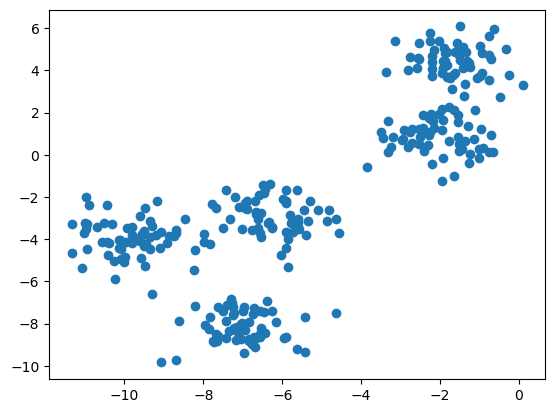

In [12]:
import numpy as np
from sklearn.datasets import make_blobs

np.random.seed(1)
x, _ = make_blobs(n_samples=300, centers=5, cluster_std=.8)
plt.scatter(x[:,0], x[:,1])
plt.show()

In [13]:
# instancia objeto MeanShift y ajusta el modelo
from sklearn.cluster import MeanShift
mshclust = MeanShift(bandwidth=2).fit(x)
print(mshclust)

MeanShift(bandwidth=2)


In [ ]:
Ahora, podemos obtener etiquetas (o ID de clúster) y puntos centrales de cada área de clúster.

In [14]:
labels = mshclust.labels_
centers = mshclust.cluster_centers_

Finalmente, visualizamos los puntos agrupados separándolos con diferentes colores y puntos centrales de cada grupo en un gráfico.

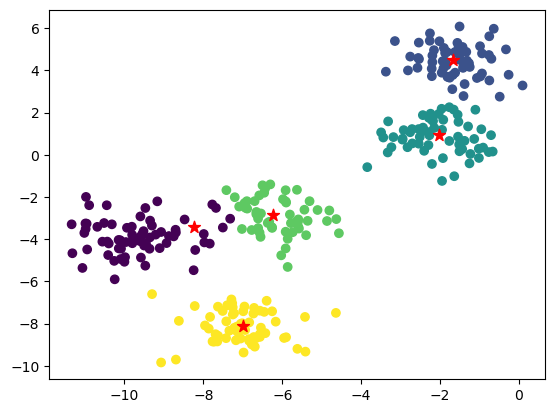

In [15]:
plt.scatter(x[:,0], x[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], marker='*', color="r",s=80 )
plt.show()

## <span style="color:#4361EE">Algoritmo DBSCAN: Density-Based Spatial Clustering of Applications with Noise</span>

El DBSCAN, un algoritmo de `agrupamiento basado en la densidad`, es una mejora sobre el agrupamiento `Mean-shift`, ya que tiene ventajas específicas. El siguiente gráfico muestra como avanza el algoritmo.

<figure>
<center>
<img src="../Imagenes/dbscan.gif" width="600" height="600" align="center" /> 
</center>   
</figure>

Fuente: [Top 5 Clustering Algorithms data scientist should know](https://www.digitalvidya.com/blog/the-top-5-clustering-algorithms-data-scientists-should-know/)

### <span style="color:#4CC9F0">Funcionamiento del algortimo</span>

1. Comienza con un punto de datos de inicio aleatorio no visitado. Todos los puntos dentro de una distancia $\epsilon$ se clasifican como puntos de vecindad

1. Necesita un número mínimo de puntos dentro del vecindario para iniciar el proceso de agrupación. En tales circunstancias, el punto de datos actual se convierte en el primer punto del grupo. De lo contrario, el punto se etiqueta como "Ruido". En cualquier caso, el punto actual se convierte en un punto visitado.

1. Todos los puntos dentro de la distancia $\epsilon$ pasan a formar parte del mismo grupo.

1. Repite el procedimiento para todos los puntos nuevos agregados al grupo de conglomerados.

1. El proceso continúa hasta que visite y etiquete cada punto dentro de la vecindad $\epsilon$ del grupo.

1. Al finalizar el proceso, se comienza de nuevo con un nuevo punto no visitado, lo que conducirá al descubrimiento de más grupos o ruido. Al final del proceso, se asegúra de marcar cada punto como clúster o ruido

### <span style="color:#4CC9F0">Ventajas del algoritmo DBSCAN</span>

El DBSCAN es mejor que otros algoritmos de clúster porque no requiere un número preestablecido de clústeres.
Identifica los valores atípicos como ruido, a diferencia del método Mean-Shift que obliga a tales puntos a entrar en el grupo a pesar de tener características diferentes.
Encuentra bastante bien grupos de formas y tamaños arbitrarios.

### <span style="color:#4CC9F0">Desventajas del algoritmo DBSCAN</span>

No es muy efectivo cuando tiene grupos de diferentes densidades. Existe una variación en la configuración del umbral de distancia $\epsilon$ y los puntos mínimos para identificar el vecindario cuando hay un cambio en los niveles de densidad.
Si tiene datos dimensionales altos, la determinación del umbral de distancia Ɛ se convierte en una tarea desafiante.

### <span style="color:#4CC9F0">Ejemplo de desempeño del algoritmo DBSCAN con datos sintéticos</span>

En este ejemplo generamos un conjunto de datos con 4 clústeres, que resulta difícil para el algoritmos k-means. Comparamos los resultados con el algoritmo DBSCAN.

#### <span style="color:#4CC9F0">Crea datos sintéticos</span>

In [16]:
import sklearn.datasets as ds
datak, labels = ds.make_circles(n_samples=250, 
                               shuffle=True, 
                               noise=0.03, 
                               random_state=123,
                               factor = 0.5)

centers = [ [4, 1], [4.5, 3]]
data2, labels2 = make_blobs(n_samples=200, 
                            cluster_std = 0.2,
                            centers=centers,
                            random_state=123)


#for i in range(len(centers)-1, -1, -1):
#    labels2[labels2==0+i] = i+2
labels2 += +2
    
labels = np.concatenate([labels, labels2])
datak = datak * [1.2, 1.8] + [1, 4.1]
datak = np.concatenate([datak, data2], axis=0)

#### <span style="color:#4CC9F0">Dibuja los datos sintéticos</span>

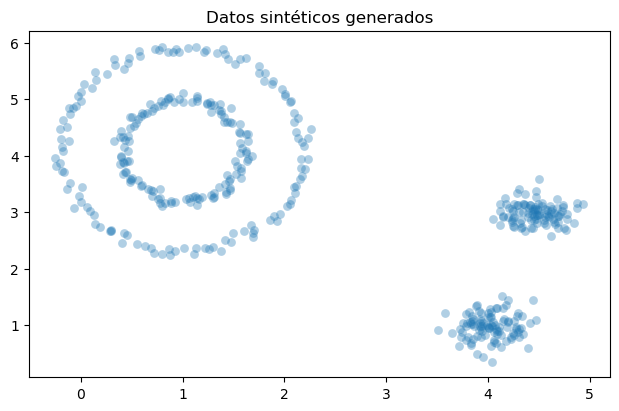

In [38]:
plot_kwds = {'alpha' : 0.35, 's' : 40, 'linewidths':0}
plt.figure(figsize = (7.5, 4.5))
plt.scatter(datak.T[0], datak.T[1],**plot_kwds)
plt.title('Datos sintéticos generados')
plt.show()

#### <span style="color:#4CC9F0">Función para graficar clústers generados </span>

In [34]:
from time import time
import seaborn as sns

def plot_clusters(data, algorithm, args, kwds):
    start_time = time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    plt.title('Clusters encontrados por {}'.format(str(algorithm.__name__)), fontsize=17)
    plt.text(-0.5, 0.68, 'Tiempo de ejecución {:.2f} s'.format(end_time - start_time), fontsize=10)

#### <span style="color:#4CC9F0">Gráficas de los clústers obtenidos por k-means y dbscan </span>

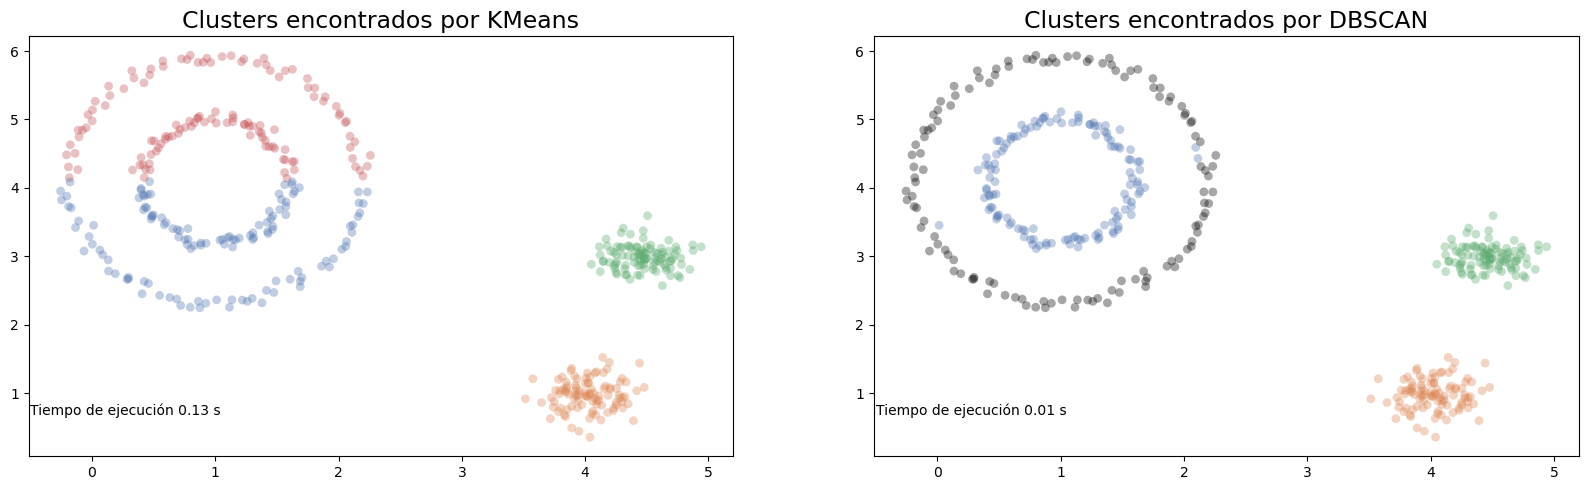

In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import  seaborn as sns

plt.figure(figsize = (20,12))
plt.subplot(221)
plot_clusters(datak, KMeans, (), {'n_clusters':4})
plt.subplot(222)
plot_clusters(datak, DBSCAN, (), {'min_samples':25})
